# Pre-Processing and Training HR Data<a id='4_Pre-Processing_and_Training_HR_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Encode Variables](#4.5_Encode_Variables)
  * [4.6 Train/Test Split](#4.6_Train/Test_Split)
  * [4.7 Classificaiton model](#4.7_Classification_model)
    * [4.7.1 Confusion Matrix](#4.7.1_Confusion_matrix)
    * [4.7.2 Logistic Regression stratified y](#4.7.2_Logistic_Regression_stratified_y)
    * [4.7.3 K-Nearest Neighbor](#4.7.3_K-Nearest_Neighbor)
    * [4.7.4 Decision Tree](#4.7.4_Decision_Tree)
    * [4.7.5 Random Forest](#4.7.5_Random_Forest)
      * [4.7.5.1 Define the pipeline](#4.7.5.1_Define_the_pipeline)
      * [4.7.5.2 Fit the pipeline](#4.7.5.2_Fit_the_pipeline)
  * [4.8 Linear Regression](#4.8_Linear_Regression)
    * [4.8.1 Linear regression model performance](#4.8.1_Linear_regression_model_performance)
  * [4.9 Summary](#4.9_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. You found a small number of data values that gave clear choices about whether to replace values or drop a whole row. Determined that predicting the job satisfaction is primary aim. Checked for missing data and any patterns in the dataseet.

In this notebook you'll start to build machine learning models. Before even starting with learning a machine learning model, however, start by considering how useful the mean value is as a predictor. This is more than just a pedagogical device. You never want to go to stakeholders with a machine learning model only to have the CEO point out that it performs worse than just guessing the average! Your first model is a baseline performance comparitor for any subsequent model. You then build up the process of efficiently and robustly creating and assessing models against it. 

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

from sklearn import metrics


print("Loaded Libraries")

#from library.sb_utils import save_file

Loaded Libraries


## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [2]:
# the supplied CSV data file is the data directory
hr_data = pd.read_csv('../data/HR-Employee-data.csv')
hr_data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [3]:
hr_data.shape

(1470, 35)

In [4]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 4.5 Encode Variables<a id='4.5_Encode_Variables'></a>

To build a model we need to convert categorical variables to numerical because sklearn takes numerical models. By encoding categorical variables, we can build accurate and unbiased machine learning models that can make useful predictions.

In [5]:
# Using get_dummies to convert categorical variables to numerical labels
hr_data_dummies = hr_data.copy()
hr_data_dummies = pd.get_dummies(hr_data_dummies)
hr_data_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


We will be creating both models linear and logistic regression. To run linear regression we will be conveting JobSatisfaction column to percentage

In [6]:
hr_data_dummies['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [7]:
hr_data_dummies['JobSatisfaction_perc'] = hr_data_dummies['JobSatisfaction'].map({1: 0.25, 2: 0.50, 3: 0.75, 4: 1.0})

In [8]:
hr_data_dummies['JobSatisfaction_perc'] = hr_data_dummies['JobSatisfaction_perc']*100

In [9]:
hr_data_dummies['JobSatisfaction_perc'].value_counts()

100.0    459
75.0     442
25.0     289
50.0     280
Name: JobSatisfaction_perc, dtype: int64

1 means 25% satisfied. 2 means 50% satisfied. 3 means 75% satisfied. 4 means 100% satisfied.

Dataframe for linear regression doesn't need 2 target columns, we can drop JobSatisfaction column and use JobSatisfaction_perc as target variable.

In [10]:
hr_data_linear = hr_data_dummies.drop(columns = ['JobSatisfaction'])
hr_data_linear.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gende

In [11]:
# Saving dataframe with jobsatisfaction columns with percentage

hr_data_linear.to_csv('../data/hr_data_linear.csv')

In [12]:
hr_data_dummies['JobSatisfaction_bool'] = hr_data_dummies['JobSatisfaction'].map({1: 0, 2: 0, 3: 1, 4: 1})
hr_data_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,JobSatisfaction_perc,JobSatisfaction_bool
0,41,1102,1,2,1,1,2,94,3,2,...,1,0,0,0,1,1,0,1,100.0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,1,0,1,1,0,50.0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,1,1,0,1,75.0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,1,0,1,0,1,75.0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,1,0,1,1,0,50.0,0


In JobSatisfaction columns 1 and 2 mapped to 0 means not satisfied, and 3 and 4 mapped to 1 means to satisfieid.

In [13]:
hr_data_dummies['JobSatisfaction_bool'].value_counts()

1    901
0    569
Name: JobSatisfaction_bool, dtype: int64

In [14]:
hr_data_logis = hr_data_dummies.drop(columns = ['JobSatisfaction', 'JobSatisfaction_perc'])
hr_data_logis.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gende

In [15]:
# Saving dataframe with jobsatisfaction columns with percentage

hr_data_logis.to_csv('../data/hr_data_logis.csv')

## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

So far, you've treated HR resort data as a single entity. In machine learning, when you train your model on all of your data, you end up with no data set aside to evaluate model performance. You could keep making more and more complex models that fit the data better and better and not realise you were overfitting to that one set of samples. By partitioning the data into training and testing splits, without letting a model (or missing-value imputation) learn anything about the test split, you have a somewhat independent assessment of how your model might perform in the future. An often overlooked subtlety here is that people all too frequently use the test set to assess model performance _and then compare multiple models to pick the best_. This means their overall model selection process is  fitting to one specific data set, now the test split. You could keep going, trying to get better and better performance on that one data set, but that's  where cross-validation becomes especially useful. While training models, a test split is very useful as a final check on expected future performance.

What partition sizes would you have with a 70/30 train/test split?

In [16]:
len(hr_data_logis) * .7, len(hr_data_logis) * .3

(1029.0, 441.0)

In [17]:
X = hr_data_logis.drop(columns='JobSatisfaction_bool')
y = hr_data_logis.JobSatisfaction_bool

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [19]:
X_train.shape, X_test.shape

((1029, 56), (441, 56))

In [20]:
y_train.shape, y_test.shape

((1029,), (441,))

In [21]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceL

In [22]:
#Check the `dtypes` attribute of `X_test` to verify all features are numeric
X_test.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceL

All the features in X are numeric.

In [23]:
y_train.value_counts()

1    617
0    412
Name: JobSatisfaction_bool, dtype: int64

Proportion of classes

When building classification models, it is always a good idea to know right away the number of samples per class, 
proportionally to the total number of samples. 
First we get the counts of each class.

In [24]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 700)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 700)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('JobSatisfaction\n(0 = Not Satisfied)', fontsize = 8)
    ax[0].set_title('% JobSatisfaction (where 1 means Satisfied):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

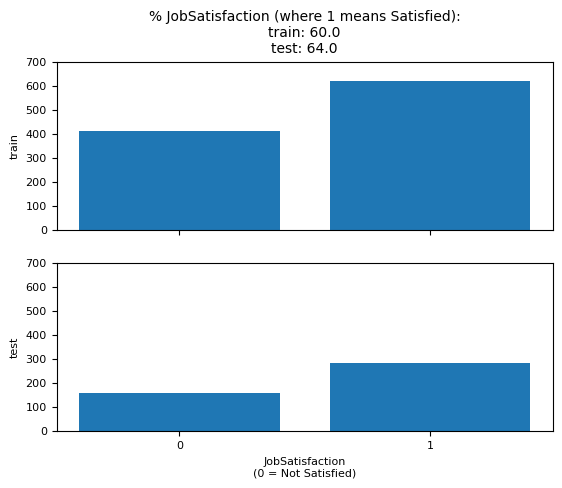

In [25]:
plot_y_ratios(y_train, y_test)

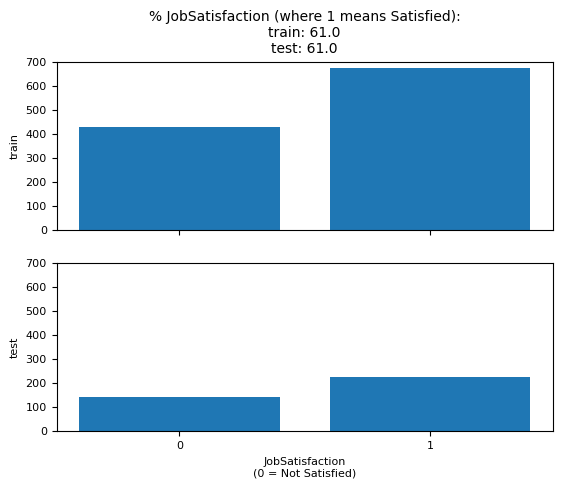

In [26]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, 
                                                                  random_state = 2, 
                                                                  stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

## 4.7 Classification model<a id='4.7_Classification_model'></a>


In [27]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [28]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [29]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(X_train), y_train):.2f}')

Accuracy on training data: 0.60


In [30]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(X_test), y_test):.2f}')

Accuracy on test data: 0.63


We can use sklearn's classification_report() function to see more details about what the classifier is actually doing. 

In [31]:
print("Classification Report for Training Data:")
print(classification_report(y_train, classifier.predict(X_train)))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.53      0.06      0.11       412
           1       0.61      0.97      0.74       617

    accuracy                           0.60      1029
   macro avg       0.57      0.51      0.42      1029
weighted avg       0.58      0.60      0.49      1029



In [32]:
print("Classification Report for Test Data")
print(classification_report(y_test, classifier.predict(X_test)))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.27      0.03      0.05       157
           1       0.64      0.96      0.77       284

    accuracy                           0.63       441
   macro avg       0.45      0.49      0.41       441
weighted avg       0.51      0.63      0.51       441



In [33]:
y_predict_test = classifier.predict(X_test)
y_predict_training = classifier.predict(X_train)

### 4.7.1 Confusion Matrix <a id='4.7.1_Confusion_matrix'></a>


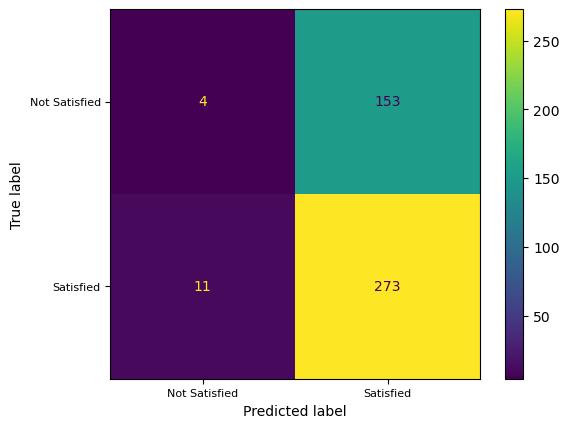

In [34]:
cm = confusion_matrix(y_test, y_predict_test, labels = classifier.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Not Satisfied', 'Satisfied'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Not Satisfied', 'Satisfied'], fontsize = 8)
ax.set_yticklabels(labels = ['Not Satisfied', 'Satisfied'], fontsize = 8)
display_cm.plot(ax = ax)

To improve model accuracy, we can try other classification models. 

### 4.7.2 Logistic Regression stratified y <a id='4.7.2_Logistic_Regression_stratified_y'></a>


In [35]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [36]:
clf.fit(Xlrstrat, ylrstrat) 

/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=500, solver='newton-cg')

In [37]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [42]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.60


### 4.7.3 K-Nearest Neighbor <a id='4.7.3_K-Nearest_Neighbor'></a>


In [43]:
#Train Model and Predict with K-Nearest Neighbor

neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.5328798185941043


### 4.7.4 Decision Tree <a id='4.7.4_Decision_Tree'></a>


In [44]:
#Train Model and Predict with Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5147392290249433


### 4.7.5 Random Forest <a id='4.7.5_Random_Forest'></a>


In [45]:
#Train Model and Predict with Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6077097505668935


Out of all the classificaiton models, logistic regression with stratified y and Random forest models show high accuracy score.
Time to stop repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. `cross_validate` will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

### 4.7.5.1 Define the pipeline <a id='4.7.5.1_Define_the_pipeline'></a>


In [63]:
#Define a pipeline comprising the steps:
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.7.5.2 Fit and assess performance using cross-validation<a id='4.7.5.2_Fit_and_assess_performance_using_cross-validation'></a>

In [64]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [65]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.05447805, -0.02928735, -0.06496911, -0.01211016, -0.08044272])

In [66]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.04825747954324448, 0.02457786894153641)

## 4.8 Linear Regression <a id='4.8_Linear_Regression'></a>


In [46]:
X_train, X_test, y_train, y_test = train_test_split(hr_data_linear.drop(columns='JobSatisfaction_perc'), 
                                                    hr_data_linear.JobSatisfaction_perc, test_size=0.3, 
                                                    random_state=47)

In [47]:
lm = LinearRegression().fit(X_train, y_train)

In [48]:
#Call the `predict()` method of the model (`lm`) on both the train and test data
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

### 4.8.1 Linear regression model performance <a id='4.8.1_Linear_regression_model_performance'></a>


In [49]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.055583198765792985, -0.03061330268057305)

In [50]:
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(23.1677179757495, 23.58415128492669)

In [51]:
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(727.7059324166302, 752.2754814880499)

In [52]:
mean_absolute_percentage_error(y_train, y_tr_pred)

0.5216273591367682

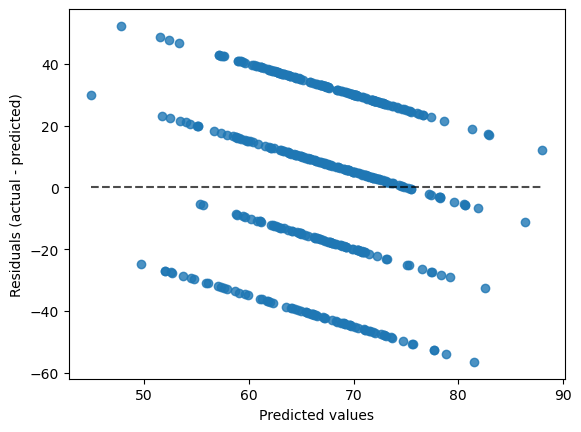

In [55]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_te_pred)
display.plot()

## 4.9 Summary <a id='4.9_Summary'></a>


In this notebook, we cleaned data during exploratory testing to build machine learning model which can predict job satisfaction. First processed data then built model using scikit-learn. In pre-processing split data into train and test parts by 70 / 30 percent, then built classification and regression models logistic, liner regression and random forest. Random forest showed better performance.